In [ ]:
from sklearn.datasets import make_circles

n = 1000

X, y = make_circles(n, noise=0.05)
X[:5], y[:5]

(array([[-1.03702114,  0.12587139],
        [ 0.84872568, -0.56232125],
        [-0.36160866, -0.78795383],
        [-0.07970407, -0.7884296 ],
        [ 0.24951532, -0.83073948]]), array([0, 0, 1, 1, 1]))

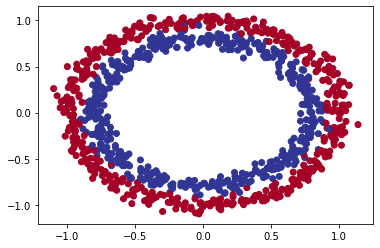

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import torch

X = torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-1.0370,  0.1259],
         [ 0.8487, -0.5623],
         [-0.3616, -0.7880],
         [-0.0797, -0.7884],
         [ 0.2495, -0.8307]]), tensor([0., 0., 1., 1., 1.]))

In [ ]:
X.dtype

torch.float32

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model0 = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10,1)
).to(device)
model0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
untrained_preds = model0(X_test.to(device))
untrained_preds.shape, y_test.shape

(torch.Size([200, 1]), torch.Size([200]))

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [ ]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [ ]:
y_logits = model0(X_test.to(device))
y_logits[:5]

tensor([[-0.2080],
        [-0.2088],
        [-0.2181],
        [-0.2224],
        [-0.2365]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
y_probs = torch.sigmoid(y_logits)
y_probs[:5]

tensor([[0.4482],
        [0.4480],
        [0.4457],
        [0.4446],
        [0.4411]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
y_preds = torch.round(y_probs)
y_preds[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
epochs = 1000

X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range(1, 1+epochs):
    
    model0.train()

    train_logits = model0(X_train).squeeze()

    train_loss = loss_fn(train_logits, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch%100==0:
        train_preds = torch.round(torch.sigmoid(train_logits))
        train_acc = accuracy(y_train, train_preds)

        model0.eval()
        with torch.inference_mode():
            test_logits = model0(X_test).squeeze()
            test_loss = loss_fn(test_logits, y_test)
            test_preds = torch.round(torch.sigmoid(test_logits))
            test_acc = accuracy(y_test, test_preds)

            print(f"Epoch: {epoch} Train Loss: {train_loss} Train Accuracy {train_acc} Test Loss {test_loss} Test Accuracy {test_acc}")

Epoch: 100 Train Loss: 0.6886174082756042 Train Accuracy 51.0 Test Loss 0.6900327801704407 Test Accuracy 46.0
Epoch: 200 Train Loss: 0.6850408911705017 Train Accuracy 54.25 Test Loss 0.6857470273971558 Test Accuracy 54.50000000000001
Epoch: 300 Train Loss: 0.6788424253463745 Train Accuracy 61.75000000000001 Test Loss 0.6791219711303711 Test Accuracy 62.0
Epoch: 400 Train Loss: 0.6682137250900269 Train Accuracy 69.25 Test Loss 0.6681727170944214 Test Accuracy 70.0
Epoch: 500 Train Loss: 0.649574875831604 Train Accuracy 76.125 Test Loss 0.6485345959663391 Test Accuracy 73.0
Epoch: 600 Train Loss: 0.6164636015892029 Train Accuracy 81.125 Test Loss 0.6144106388092041 Test Accuracy 79.0
Epoch: 700 Train Loss: 0.5566791892051697 Train Accuracy 85.375 Test Loss 0.5558760762214661 Test Accuracy 85.0
Epoch: 800 Train Loss: 0.46715617179870605 Train Accuracy 88.875 Test Loss 0.4705425798892975 Test Accuracy 89.5
Epoch: 900 Train Loss: 0.35664087533950806 Train Accuracy 92.625 Test Loss 0.3641559

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

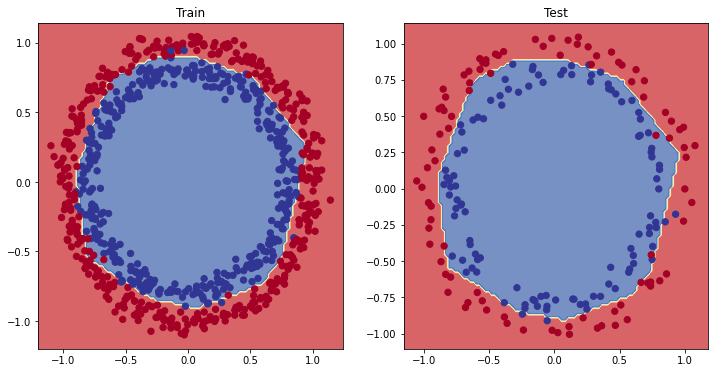

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model0, X_test, y_test)

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X_blob, y_blob = make_blobs(
    n_samples=1000, 
    n_features=2, 
    centers=5,
    cluster_std=1.5
)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob[:5], y_blob[:5]

(tensor([[-0.7374, -8.2741],
         [-8.5665,  2.1761],
         [ 4.3719, -0.7849],
         [ 0.3173, -5.3881],
         [-5.6947,  0.1533]]), tensor([2, 0, 3, 2, 0]))

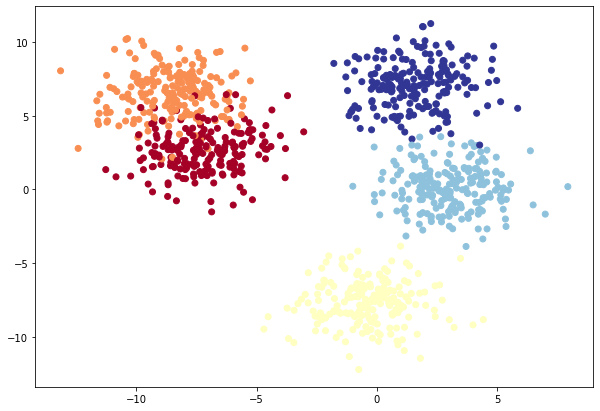

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2)

In [ ]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, in_features, out_features, hidden=10):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_features)
        )
    def forward(self, x):
        return self.linear_stack(x)

blob_model = BlobModel(2, 5).to(device)

blob_model

BlobModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=5, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=blob_model.parameters(), lr=0.1)

In [ ]:
y_logits = blob_model(X_train.to(device))
y_prob = torch.softmax(y_logits, dim=1)
y_pred = torch.argmax(y_prob, dim=1)
y_logits[:5], y_prob[:5], y_pred[:5]

(tensor([[ 0.1854, -0.1062, -0.4232,  0.0802, -0.0590],
         [ 0.5048, -0.5758, -0.3075, -0.0461, -0.1152],
         [ 0.2488, -0.3410, -0.2743,  0.0808, -0.0938],
         [ 0.0436, -0.1523, -0.2478,  0.1821, -0.0761],
         [ 0.1515, -0.0527, -0.0661,  0.3224, -0.0242]], device='cuda:0',
        grad_fn=<SliceBackward0>),
 tensor([[0.2516, 0.1880, 0.1369, 0.2265, 0.1970],
         [0.3451, 0.1171, 0.1532, 0.1989, 0.1857],
         [0.2701, 0.1497, 0.1601, 0.2283, 0.1918],
         [0.2172, 0.1785, 0.1623, 0.2494, 0.1927],
         [0.2153, 0.1755, 0.1732, 0.2554, 0.1806]], device='cuda:0',
        grad_fn=<SliceBackward0>),
 tensor([0, 0, 0, 3, 3], device='cuda:0'))

In [ ]:
epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(1, epochs+1):
    blob_model.train()

    train_logits = blob_model(X_train)

    train_loss = loss_fn(train_logits,y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch%100==0:
        train_prob = torch.softmax(train_logits, dim=1)
        train_pred = torch.argmax(train_prob, dim=1)
        train_acc = accuracy(y_train, train_pred)

        blob_model.eval()
        with torch.inference_mode():
            test_logits = blob_model(X_test)
            test_prob = torch.softmax(test_logits, dim=1)
            test_pred = torch.argmax(test_prob, dim=1)

            test_loss = loss_fn(test_logits,y_test)
            test_acc = accuracy(y_test, test_pred)

            print(f"Epoch: {epoch} Train Loss: {train_loss} Train Accuracy {train_acc} Test Loss {test_loss} Test Accuracy {test_acc}")

Epoch: 100 Train Loss: 0.18791139125823975 Train Accuracy 93.25 Test Loss 0.24066585302352905 Test Accuracy 89.5
Epoch: 200 Train Loss: 0.1570686548948288 Train Accuracy 93.75 Test Loss 0.21734263002872467 Test Accuracy 89.5
Epoch: 300 Train Loss: 0.14285965263843536 Train Accuracy 94.125 Test Loss 0.2034016251564026 Test Accuracy 90.5
Epoch: 400 Train Loss: 0.13155776262283325 Train Accuracy 94.625 Test Loss 0.19124315679073334 Test Accuracy 92.0
Epoch: 500 Train Loss: 0.13858942687511444 Train Accuracy 94.375 Test Loss 0.22391517460346222 Test Accuracy 90.5
Epoch: 600 Train Loss: 0.12481754273176193 Train Accuracy 95.0 Test Loss 0.19738024473190308 Test Accuracy 92.0
Epoch: 700 Train Loss: 0.108145572245121 Train Accuracy 96.625 Test Loss 0.17041288316249847 Test Accuracy 92.0
Epoch: 800 Train Loss: 0.11932788044214249 Train Accuracy 95.0 Test Loss 0.19236041605472565 Test Accuracy 91.5
Epoch: 900 Train Loss: 0.10213068127632141 Train Accuracy 96.375 Test Loss 0.16518138349056244 Tes

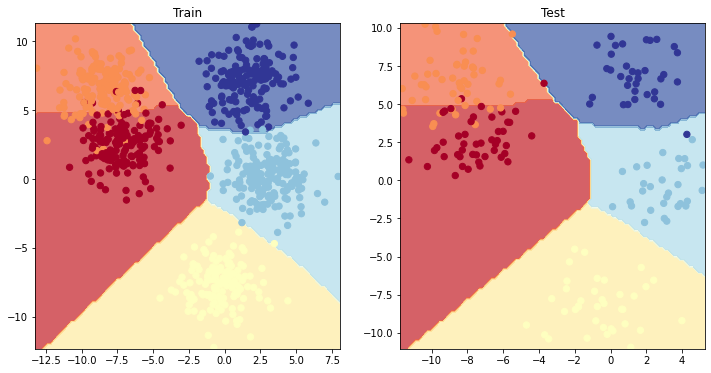

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(blob_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(blob_model, X_test, y_test)

In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(1000, noise=0.05)
X[:5], y[:5]

(array([[ 0.94012418,  0.33176208],
        [ 0.37393419, -0.17373069],
        [ 1.36992762, -0.41051064],
        [ 1.95741474,  0.32533053],
        [-0.21744402,  0.91127427]]), array([0, 1, 1, 1, 0]))

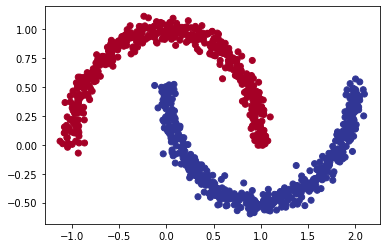

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [4]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.9401,  0.3318],
         [ 0.3739, -0.1737],
         [ 1.3699, -0.4105],
         [ 1.9574,  0.3253],
         [-0.2174,  0.9113]]), tensor([0., 1., 1., 1., 0.]))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [6]:
from torch import nn

class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(2, 5),
            nn.ReLU(),
            nn.Linear(5,10),
            nn.ReLU(),
            nn.Linear(10,5),
            nn.ReLU(),
            nn.Linear(5,1)
        )

    def forward(self, x):
        return self.linear_stack(x)

model = MoonModel().to(device)
model

MoonModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=5, bias=True)
    (5): ReLU()
    (6): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [7]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [8]:
def accuracy(true, pred):
    return (torch.eq(true, pred).sum().item()/len(pred))*100

In [9]:
epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(1, 1+epochs):
    model.train()

    train_logits = model(X_train).squeeze()
    train_loss = loss_fn(train_logits, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch%100==0:
        train_pred = torch.round(torch.sigmoid(train_logits))
        train_acc = accuracy(train_pred, y_train)

        model.eval()
        with torch.inference_mode():
            test_logits = model(X_test).squeeze()
            test_loss = loss_fn(test_logits, y_test)
            test_pred = torch.round(torch.sigmoid(test_logits))
            test_acc = accuracy(test_pred, y_test)
            print(f"Epoch: {epoch} Train Loss: {train_loss} Train Acc: {train_acc} Test Loss: {test_loss} Test Acc: {test_acc}")

Epoch: 100 Train Loss: 0.42132896184921265 Train Acc: 84.125 Test Loss: 0.41829025745391846 Test Acc: 82.0
Epoch: 200 Train Loss: 0.24431194365024567 Train Acc: 89.0 Test Loss: 0.2497900277376175 Test Acc: 89.0
Epoch: 300 Train Loss: 0.22669929265975952 Train Acc: 89.625 Test Loss: 0.233213871717453 Test Acc: 89.5
Epoch: 400 Train Loss: 0.20042966306209564 Train Acc: 90.75 Test Loss: 0.20695869624614716 Test Acc: 90.5
Epoch: 500 Train Loss: 0.13431313633918762 Train Acc: 94.25 Test Loss: 0.14035873115062714 Test Acc: 94.0
Epoch: 600 Train Loss: 0.055305927991867065 Train Acc: 99.5 Test Loss: 0.05843866616487503 Test Acc: 99.0
Epoch: 700 Train Loss: 0.025866298004984856 Train Acc: 100.0 Test Loss: 0.026932500302791595 Test Acc: 100.0
Epoch: 800 Train Loss: 0.015237579122185707 Train Acc: 100.0 Test Loss: 0.015639422461390495 Test Acc: 100.0
Epoch: 900 Train Loss: 0.0102809714153409 Train Acc: 100.0 Test Loss: 0.010425712913274765 Test Acc: 100.0
Epoch: 1000 Train Loss: 0.007532152347266

In [10]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


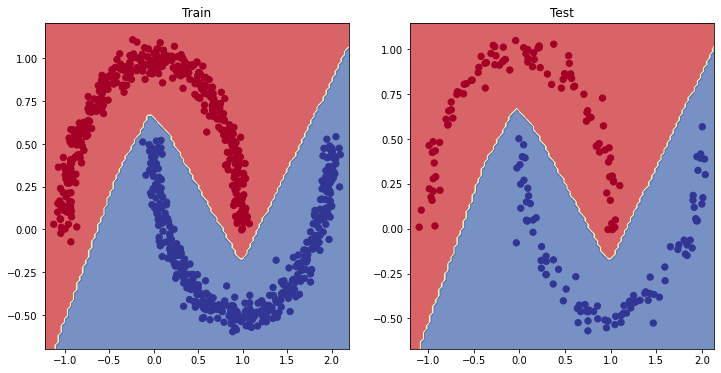

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)